**Exercise 1**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def display_image(title, image):
    plt.figure(figsize=(4,4))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [3]:
image = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)

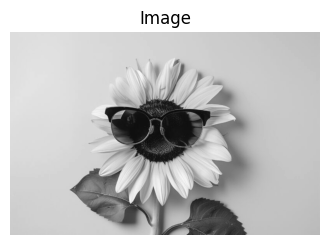

In [5]:
display_image('Image', image)

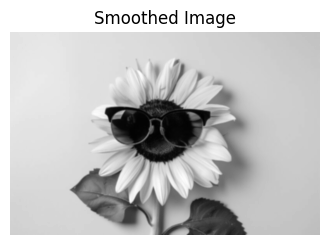

In [ ]:
smoothed_image = cv2.GaussianBlur(image, (5, 5), 1.4)
display_image('Smoothed Image', smoothed_image)

In [8]:
grad_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)

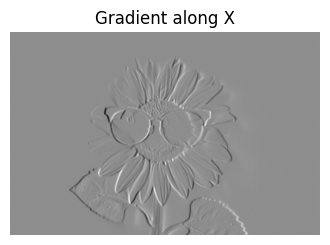

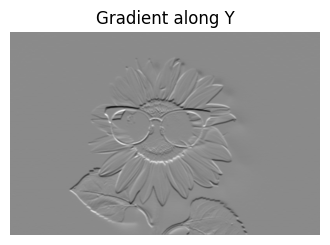

In [9]:
display_image('Gradient along X', grad_x)
display_image('Gradient along Y', grad_y)

In [10]:
magnitude = np.sqrt(grad_x**2 + grad_y**2)
angle = np.arctan2(grad_y, grad_x) * 180 / np.pi

In [11]:
def non_maximum_suppression(magnitude, angle):
    """Thin out edges by keeping only the local maxima."""
    suppressed = np.zeros(magnitude.shape, dtype=np.float32)
    angle = angle % 180

    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
        
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] < 180):
                q, r = magnitude[i, j + 1], magnitude[i, j - 1]
            
            elif 22.5 <= angle[i, j] < 67.5:
                q, r = magnitude[i + 1, j - 1], magnitude[i - 1, j + 1]
            
            elif 67.5 <= angle[i, j] < 112.5:
                q, r = magnitude[i + 1, j], magnitude[i - 1, j]
            
            else:
                q, r = magnitude[i - 1, j - 1], magnitude[i + 1, j + 1]

            
            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                suppressed[i, j] = magnitude[i, j]
            else:
                suppressed[i, j] = 0

    return suppressed

nms_image = non_maximum_suppression(magnitude, angle)

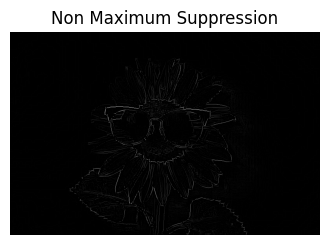

In [12]:
display_image('Non Maximum Suppression', nms_image)

In [13]:
high_threshold = 0.2 * nms_image.max()
low_threshold = 0.1 * nms_image.max()

strong_edges = (nms_image >= high_threshold).astype(np.uint8)
weak_edges = ((nms_image >= low_threshold) & (nms_image < high_threshold)).astype(np.uint8)

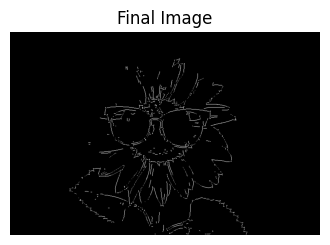

In [14]:
def hysteresis(strong_edges, weak_edges):
    edges = np.copy(strong_edges)
    h, w = edges.shape
    for y in range(1, h - 1):
        for x in range(1, w - 1):
            if weak_edges[y, x] and np.any(strong_edges[y - 1:y + 2, x - 1:x + 2]):
                edges[y, x] = 1
    return edges

final_edges = hysteresis(strong_edges, weak_edges)
display_image('Final Image', final_edges)

**Exercise 2**

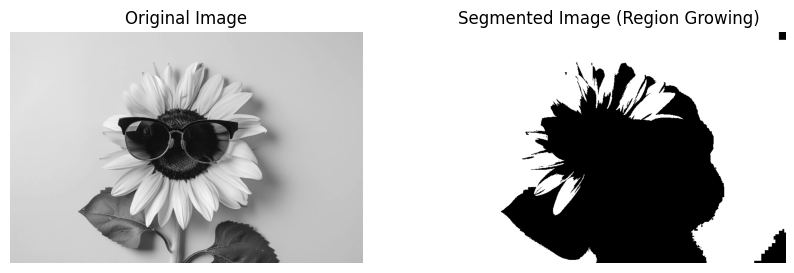

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(img, seed, threshold):
    segmented_image = np.zeros_like(img)
    rows, cols = img.shape
    queue = [seed]
    seed_value = img[seed]
    segmented_image[seed] = 255
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
    while queue:
        x, y = queue.pop(0)
        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and segmented_image[nx, ny] == 0:
                if abs(int(img[nx, ny]) - int(seed_value)) <= threshold:
                    queue.append((nx, ny))
                    segmented_image[nx, ny] = 255
    return segmented_image

image = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)

seed_point = (50, 50)
threshold_value = 30 

segmented_image = region_growing(image, seed_point, threshold_value)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image (Region Growing)')
plt.axis('off')

plt.show()
